In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

In [3]:
data = load_digits()
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
data['data'].shape

(1797, 64)

In [5]:
import matplotlib.pyplot as plt
i = 3 
plt.imshow(data['images'][i], cmap='copper')
plt.title(f"Ini angka {data['target'][i]}")

Text(0.5, 1.0, 'Ini angka 3')

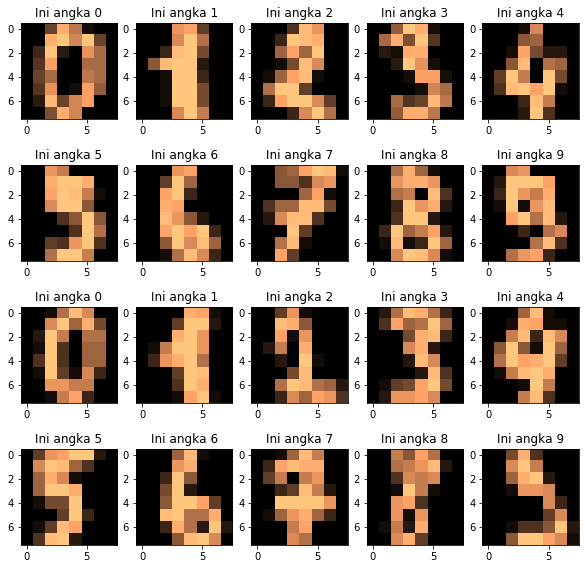

In [6]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(data['images'][i], cmap='copper')
    plt.title(f"Ini angka {data['target'][i]}")

In [8]:
#Pakai data supaya langsung, karena ada 64 feature, sementara images 8 x 8
data['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
dfDigit = pd.DataFrame(data['data'])
dfDigit['target'] = data['target']
dfDigit

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [12]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(dfDigit.drop(['target'], axis=1), dfDigit['target'], test_size = .15)

In [17]:
from sklearn.linear_model import LogisticRegression

In [20]:
modelRR = LogisticRegression(solver='liblinear', multi_class='auto')
modelRR.fit(xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
xts.iloc[0]

0      0.0
1      0.0
2     13.0
3     16.0
4     15.0
      ... 
59     7.0
60     0.0
61     0.0
62     0.0
63     0.0
Name: 819, Length: 64, dtype: float64

In [22]:
yts.iloc[0]

7

In [23]:
modelRR.predict([xts.iloc[0]])[0]

7

Text(0.5, 1.0, 'Aktual = 1 | Prediksi = 3')

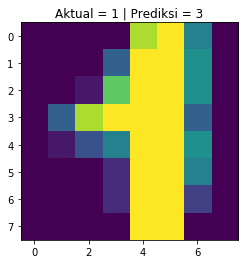

In [39]:
i = 265
plt.imshow(np.array(xts.iloc[i].tolist()).reshape(8,8))
plt.title(f'Aktual = {yts.iloc[i]} | Prediksi = {modelRR.predict([xts.iloc[i]])[0]}')

In [40]:
modelRR.score(xts, yts)

0.9407407407407408

In [41]:
modelRR.score(xtr, ytr)

0.9960707269155207

In [44]:
from sklearn.datasets import fetch_olivetti_faces

In [46]:
fof = fetch_olivetti_faces()
dir(fof)

['DESCR', 'data', 'images', 'target']

In [47]:
len(fof['images'][0][0])
#total data 400
#@data = [4096]
#@images = [64 x 64]
#40 orang

64

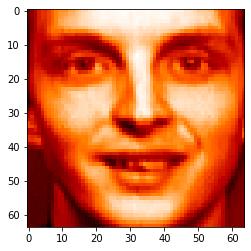

In [65]:
plt.imshow(fof['images'][391], cmap='gist_heat')

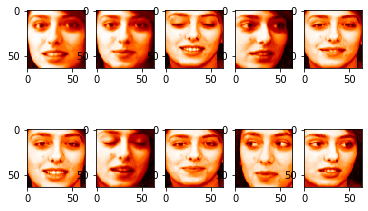

In [62]:
for i in range(10):
    people = 8
    plt.subplot(2,5,i+1)
    plt.imshow(fof['images'][i + (10*(people-1))], cmap='gist_heat')